In [1]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Stock_Index.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [3]:
columns_to_analyze = df.columns[1:] 

# Show the mean and other properties of the selected columns
column_stats = df[columns_to_analyze].describe()

print(column_stats)

               Open          High           Low         Close     Adj Close  \
count   2667.000000   2667.000000   2667.000000   2667.000000   2667.000000   
mean    8269.195149   8312.379344   8211.006332   8261.834986   8261.834986   
std     2585.209169   2592.927841   2568.153153   2581.268450   2581.268450   
min     4623.149902   4623.149902   4531.149902   4544.200195   4544.200195   
25%     5815.699951   5855.649902   5764.375000   5817.650147   5817.650147   
50%     8132.950195   8180.200195   8089.399902   8129.350098   8129.350098   
75%    10481.300295  10534.850100  10415.774905  10471.750000  10471.750000   
max    15371.450200  15431.750000  15243.400390  15314.700200  15314.700200   

             Volume  
count  2.667000e+03  
mean   2.178558e+05  
std    2.291874e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.662000e+05  
75%    2.771000e+05  
max    1.811000e+06  


In [4]:
df.interpolate(method='cubic', inplace=True)
#Interpolating the missing values in dataset.
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0
...,...,...,...,...,...,...,...
2689,2021-04-26,14449.450200,14557.500000,14421.299810,14485.000000,14485.000000,452700.0
2690,2021-04-27,14493.799810,14667.549810,14484.849610,14653.049810,14653.049810,451800.0
2691,2021-04-28,14710.500000,14890.250000,14694.950200,14864.549810,14864.549810,457000.0
2692,2021-04-29,14979.000000,15044.349610,14814.450200,14894.900390,14894.900390,517500.0


In [5]:
columns_to_analyze = df.columns[1:] 

# Show the mean and other properties of the selected columns
column_stats = df[columns_to_analyze].describe()

print(column_stats)

               Open          High           Low         Close     Adj Close  \
count   2694.000000   2694.000000   2694.000000   2694.000000   2694.000000   
mean    8256.604587   8299.720354   8198.427113   8249.229115   8249.229115   
std     2585.415766   2593.186790   2568.459281   2581.652997   2581.652997   
min     4623.149902   4623.149902   4531.149902   4544.200195   4544.200195   
25%     5803.624878   5845.687622   5750.112671   5797.612426   5797.612426   
50%     8125.175049   8169.250000   8082.550049   8125.675049   8125.675049   
75%    10475.212890  10524.100098  10409.112793  10459.737305  10459.737305   
max    15371.450200  15431.750000  15243.400390  15314.700200  15314.700200   

             Volume  
count  2.694000e+03  
mean   2.170559e+05  
std    2.292163e+05  
min   -4.411339e-03  
25%    0.000000e+00  
50%    1.655000e+05  
75%    2.750500e+05  
max    1.811000e+06  


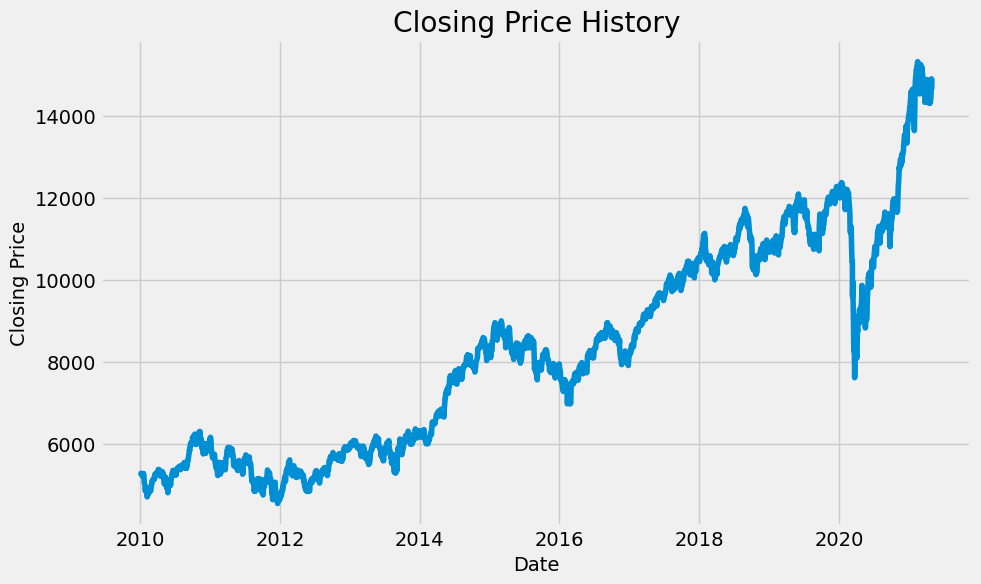

In [6]:
# Extract the closing prices column
df['Date'] = pd.to_datetime(df['Date'])

closing_prices = df['Close']

# Plot the closing price history
plt.figure(figsize=(10, 6))
plt.plot(df['Date'],closing_prices)
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close column'
data = df. filter (['Close']) 
#Convert the dataframe to a numpy array
dataset= data.values 

# Scale the data 
scaler = MinMaxScaler (feature_range=(0,1)) 
scaled_data = scaler.fit_transform(dataset) 
scaled_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.95820525],
       [0.96102318],
       [0.93653028]])

In [8]:
model= load_model("my_model.h5")

In [9]:
def evaluate():
    
    # Input the csv file
    df = pd.read_csv('sample_input.csv')
     
    actual_close = np.loadtxt('sample_close.txt')
    
    pred_close = predict_func(df)
    
    # Calculation of squared_error
    actual_close = np.array(actual_close)
    pred_close = np.array(pred_close)
    mean_square_error = np.mean(np.square(actual_close-pred_close))


    pred_prev = [df['Close'].iloc[-50]]
    pred_prev.append(pred_close[0])
    pred_curr = pred_close
    
    actual_prev = [df['Close'].iloc[-50]]
    actual_prev.append(actual_close[0])
    actual_curr = actual_close

    # Calculation of directional_accuracy
    pred_dir = np.array(pred_curr)-np.array(pred_prev)
    actual_dir = np.array(actual_curr)-np.array(actual_prev)
    dir_accuracy = np.mean((pred_dir*actual_dir)>0)*100

    print(f'Mean Square Error: {mean_square_error:.6f}\nDirectional Accuracy: {dir_accuracy:.1f}')

In [10]:
def predict_func(data):
    
    data.interpolate(method='cubic', inplace=True)
    dataset = data['Close']

    # Preprocess the input data (apply the same preprocessing steps as the training data)
    scaled_data = scaler.transform(dataset.values.reshape(-1, 1))

    # Reshape the input data to match the model's expected input shape
    x_test = np.reshape(scaled_data, (1, scaled_data.shape[0], scaled_data.shape[1]))

    # Make predictions using the trained model
    predictions = model.predict(x_test)

    # Scale the predictions back to the original range
    predicted_prices = scaler.inverse_transform(predictions)

    # Extract the closing prices for the next 2 samples
    closing_prices = predicted_prices.flatten().tolist()
    
    print(closing_prices)

    return closing_prices

In [11]:
if __name__== "__main__":
    evaluate()
#Prints predicted values, mean squared error and directional accuracy

1/1 [==============================] - 1s 1s/step
[7200.9921875, 7249.4169921875]
Mean Square Error: 892.607942
Directional Accuracy: 100.0
